<a href="https://colab.research.google.com/github/ClaudioRob/controle-acervo-biblioteca-ufrn/blob/main/7_Days_of_Code_Alura_Python_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados do Acervo - Empréstimos

##### Dia_1-Importando_dados

In [2]:
import requests
import pandas as pd

In [3]:
# URL base do repositório no GitHub
api_url = "https://api.github.com/repos/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/contents/Dia_1-Importando_dados/Datasets/dados_emprestimos"

In [4]:
# Obter a lista de arquivos no diretório
response = requests.get(api_url)
files = response.json()

In [5]:
# Lista para armazenar os DataFrames importados
dataframes = []

In [6]:
# Filtrar e ler arquivos CSV
for file in files:
    if file['name'].endswith('.csv'):
        file_url = file['download_url']
        df = pd.read_csv(file_url)
        dataframes.append(df)
        print(f"Sucesso ao importar {file['name']}")

Sucesso ao importar emprestimos-20101.csv
Sucesso ao importar emprestimos-20102.csv
Sucesso ao importar emprestimos-20111.csv
Sucesso ao importar emprestimos-20112.csv
Sucesso ao importar emprestimos-20121.csv
Sucesso ao importar emprestimos-20122.csv
Sucesso ao importar emprestimos-20131.csv
Sucesso ao importar emprestimos-20132.csv
Sucesso ao importar emprestimos-20141.csv
Sucesso ao importar emprestimos-20142.csv
Sucesso ao importar emprestimos-20151.csv
Sucesso ao importar emprestimos-20152.csv
Sucesso ao importar emprestimos-20161.csv
Sucesso ao importar emprestimos-20162.csv
Sucesso ao importar emprestimos-20171.csv
Sucesso ao importar emprestimos-20172.csv
Sucesso ao importar emprestimos-20181.csv
Sucesso ao importar emprestimos-20182.csv
Sucesso ao importar emprestimos-20191.csv
Sucesso ao importar emprestimos-20192.csv
Sucesso ao importar emprestimos-20201.csv


Concatenando Datafremes

In [7]:
# Concatenar todos os DataFrames em um único DataFrame
emprestimos = pd.concat(dataframes, ignore_index=True)

Total de Registros

In [8]:
# Contar o número total de registros
total_registros = emprestimos.shape[0]
print(f"Número total de registros no DataFrame concatenado: {total_registros}")

Número total de registros no DataFrame concatenado: 2258018


In [9]:
# Exibir os primeiros registros do DataFrame concatenado para verificação
print("DataFrame concatenado a partir dos CSVs:")
print(emprestimos.head())

DataFrame concatenado a partir dos CSVs:
   id_emprestimo codigo_barras                 data_renovacao  \
0         709684       L095049                            NaN   
1         709685       L167050                            NaN   
2         709686    2006017618  2010/01/26 08:07:01.738000000   
3         709687       L184117  2010/01/18 11:07:46.470000000   
4         709684       L095049                            NaN   

                 data_emprestimo                 data_devolucao  \
0  2010/01/04 07:44:10.721000000  2010/01/05 16:26:12.662000000   
1  2010/01/04 07:44:10.750000000  2010/01/12 07:34:13.934000000   
2  2010/01/04 08:08:44.081000000  2010/02/25 07:36:25.800000000   
3  2010/01/04 08:24:21.284000000  2010/02/03 08:58:45.692000000   
4  2010/01/04 07:44:10.721000000  2010/01/05 16:26:12.662000000   

   matricula_ou_siape    tipo_vinculo_usuario  
0        2.008023e+09      ALUNO DE GRADUAÇÃO  
1        2.008023e+09      ALUNO DE GRADUAÇÃO  
2        2.008112e+09

Estrutura dataframe emprestimos

In [10]:
# Verificar a estrutura do DataFrame emprestimos
print("Estrutura do DataFrame emprestimos:")
print(emprestimos.info())

Estrutura do DataFrame emprestimos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258018 entries, 0 to 2258017
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 120.6+ MB
None


Verificando Duplicatas

In [11]:
# Verificar duplicatas
duplicates = emprestimos.duplicated()
print(f"Número de duplicatas nos CSVs: {duplicates.sum()}")

Número de duplicatas nos CSVs: 37


Removendo Duplicatas

In [12]:
# Verificar duplicatas e remover duplicatas se necessário
emprestimos = emprestimos.drop_duplicates()

Validando exclusao de registros duplicados

In [13]:
# Verificar duplicatas
duplicates = emprestimos.duplicated()
print(f"Número de duplicatas nos CSVs: {duplicates.sum()}")

Número de duplicatas nos CSVs: 0


Dados do Acervo - Exemplares

In [14]:
# Carregar o DataFrame a partir do arquivo Parquet
parquet_url = 'https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_1-Importando_dados/Datasets/dados_exemplares.parquet'
exemplares = pd.read_parquet(parquet_url)
print(exemplares.head())

       id_exemplar codigo_barras            colecao  \
index                                                 
0                5       L000003  Acervo Circulante   
1                4       L000002  Acervo Circulante   
2                3       L000001  Acervo Circulante   
3                7       L000114  Acervo Circulante   
5               10       L000041  Acervo Circulante   

                           biblioteca status_material  localizacao  \
index                                                                
0      Biblioteca Central Zila Mamede         REGULAR          694   
1      Biblioteca Central Zila Mamede         REGULAR          688   
2      Biblioteca Central Zila Mamede        ESPECIAL          638   
3      Biblioteca Central Zila Mamede         REGULAR          616   
5      Biblioteca Central Zila Mamede        ESPECIAL          657   

       registro_sistema  
index                    
0                     1  
1                     1  
2                  

Unindo os Dataframes (merge)

In [15]:
# Assegurar que 'codigo_barras' seja uma coluna em ambos os DataFrames
if 'codigo_barras' in exemplares.index.names:
    exemplares.reset_index(inplace=True)

if 'codigo_barras' in emprestimos.index.names:
    emprestimos.reset_index(inplace=True)

In [16]:
# Mesclar os DataFrames emprestimos e exemplares pela coluna 'codigo_barras'
emprestimos_completo = pd.merge(emprestimos, exemplares, on='codigo_barras', how='inner')

In [17]:
# Contar o número total de registros no DataFrame final
total_registros_final = emprestimos_completo.shape[0]
print(f"Número total de registros no DataFrame final: {total_registros_final}")

Número total de registros no DataFrame final: 2072522


### Dia_2_As_primeiras_manipulacoes

In [18]:
import pandas as pd

In [19]:
emprestimos_completo.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2.008050e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,2.007226e+08,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009


In [20]:
# # Definindo a lista CDU_lista
# CDU_lista = []
# for CDU in emprestimos_completo['localizacao']:
#   if (CDU < 100):
#     CDU_lista.append('Generalidades')
#   elif (CDU < 200):
#     CDU_lista.append('Filosofia e Psicologia')
#   elif (CDU < 300):
#     CDU_lista.append('Ciências Sociais')
#   elif (CDU < 400):
#     CDU_lista.append('Classe vaga. Provisoriamente não ocupada.')
#   elif (CDU < 500):
#     CDU_lista.append('Matemática e ciências naturais')
#   elif (CDU < 600):
#     CDU_lista.append('Ciências aplicadas')
#   elif (CDU < 700):
#     CDU_lista.append('Belas artes')
#   elif (CDU < 800):
#     CDU_lista.append('Linguagem')
#   elif (CDU < 900):
#     CDU_lista.append('Geografia. Biografia. História.')
#   else:
#     CDU_lista.append('Generalidades')

# emprestimos_completo['CDU_geral'] = CDU_lista

In [21]:
# Definindo a lista CDU_lista
CDU_lista = [
    (0, 99, "Generalidades. Ciência e conhecimento."),
    (100, 199, "Filosofia e psicologia."),
    (200, 299, "Religião."),
    (300, 399, "Ciências sociais."),
    (400, 499, "Classe vaga. Provisoriamente não ocupada."),
    (500, 599, "Matemática e ciências naturais."),
    (600, 699, "Ciências aplicadas."),
    (700, 799, "Belas artes."),
    (800, 899, "Linguagem. Língua. Linguística."),
    (900, 999, "Geografia. Biografia. História.")
]

In [22]:
# Função para classificar o código de localização
def classificar_localizacao(codigo):
    for inicio, fim, descricao in CDU_lista:
        if inicio <= codigo <= fim:
            return descricao
    return "Código fora do intervalo especificado"

In [23]:
# Supondo que você já tem o DataFrame emprestimos_completo
# emprestimos_completo = pd.read_csv('caminho/para/seu/dataframe.csv')  # Se você estiver lendo o DataFrame de um arquivo

# Aplicando a função de classificação ao DataFrame
emprestimos_completo['localizacao'] = emprestimos_completo['localizacao'].apply(classificar_localizacao)

# Exibindo o DataFrame resultante
print("DataFrame após substituição dos códigos:")
emprestimos_completo.head()

DataFrame após substituição dos códigos:


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,4225
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,4225
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,25009
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2.008050e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,25009
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,2.007226e+08,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,25009


In [24]:
# Excluindo a coluna 'registro_sistema'
emprestimos_completo = emprestimos_completo.drop(columns=['registro_sistema'])

In [25]:
# Convertendo a coluna 'matricula_ou_siape' para string
emprestimos_completo['matricula_ou_siape'] = emprestimos_completo['matricula_ou_siape'].astype(str)


In [26]:
# Exibindo o DataFrame resultante
print("DataFrame após as alterações:")
emprestimos_completo.head()

DataFrame após as alterações:


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.


### Dia_3_Explorando_o_Datetime_dos_dados

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [28]:
emprestimos_completo.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.


In [29]:
# Verificando a relação entre emprestimo e exemplar
emprestimos_completo['id_emprestimo'].value_counts()

id_emprestimo
2010326     3
2014596     3
10240112    3
2422542     3
9690168     3
           ..
2767562     1
2317930     1
2283256     1
2262867     1
2989061     1
Name: count, Length: 2068724, dtype: int64

In [30]:
# localizando cada empréstimo por emprestimo de exemplares
emprestimos_completo.loc[emprestimos_completo['id_emprestimo']==2010326]

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao
1594544,2010326,2010082015,NaN,2015/06/02 17:56:18.917000000,2015/06/19 15:42:51.000000000,2010023153.0,ALUNO DE GRADUAÇÃO,1055921,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.
1594545,2010326,2010082015,NaN,2015/06/02 17:56:18.917000000,2015/06/19 15:42:51.000000000,2010023153.0,ALUNO DE GRADUAÇÃO,1055569,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.
1594546,2010326,2010082015,NaN,2015/06/02 17:56:18.917000000,2015/06/19 15:42:51.000000000,2010023153.0,ALUNO DE GRADUAÇÃO,1056359,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências sociais.


In [31]:
# eliminando empréstimos duplicados
emprestimo = len(emprestimos_completo['id_emprestimo'].drop_duplicates())

In [32]:
# total de exemplares emprestados
exemplares = len(emprestimos_completo)
exemplares

2072522

### Agrupando quantidade de empréstimos POR DATA

In [33]:
# agrupando exemplares emprestados por data
emprestimos_completo['data_emprestimo'] = pd.to_datetime(emprestimos_completo['data_emprestimo'])
exemplares_por_data = emprestimos_completo.groupby('data_emprestimo').size().reset_index(name='total_exemplares')

exemplares_por_data

,data_emprestimo,total_exemplares
0,2010-01-04 07:44:10.721,1
1,2010-01-04 07:44:10.750,1
2,2010-01-04 08:08:44.081,1
3,2010-01-04 08:24:21.284,1
4,2010-01-04 08:27:33.569,1
...,...,...
2068686,2020-05-05 19:51:06.059,1
2068687,2020-05-05 19:51:06.135,1
2068688,2020-05-05 19:51:06.164,1
2068689,2020-06-09 11:54:02.669,1


### Quantidade de empréstimos POR ANO

In [34]:
# quantidade total de emprestimos por ano
emprestimos_completo['data_emprestimo'] = pd.to_datetime(emprestimos_completo['data_emprestimo'])

In [35]:
# Extraindo o ano da coluna de data
emprestimos_completo['ano'] = emprestimos_completo['data_emprestimo'].dt.year

In [36]:
# Agrupando por ano e contando o número de empréstimos em cada ano
emprestimos_por_ano = emprestimos_completo.groupby('ano').size().reset_index(name='quantidade')

emprestimos_por_ano

,ano,quantidade
0,2010,161394
1,2011,196390
2,2012,221365
3,2013,234749
4,2014,219189
5,2015,213582
6,2016,215900
7,2017,218462
8,2018,194080
9,2019,171801


In [37]:
# Configurando os temos dos gráficos

sns.set_theme(context='notebook',
              style='darkgrid',
              palette='deep',
              font_scale=1.3,
              rc={"figure.figsize":(15,8)})

Text(0.0, 1.0, 'Quantidade de exemplares emprestados do SISBI por ANO\n')

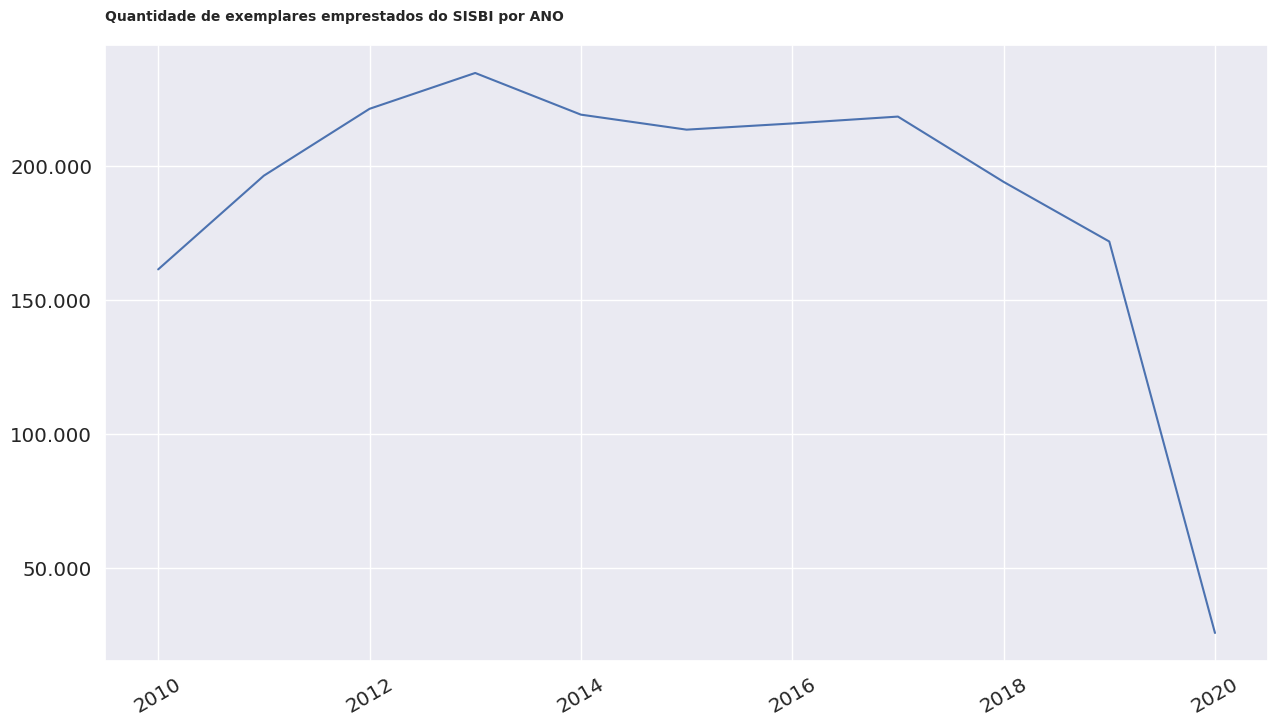

In [38]:
ax = sns.lineplot(data=emprestimos_por_ano,x='ano',y='quantidade')
ax.set(xlabel=None, ylabel=None)
ax.tick_params(axis='x', rotation=30)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))

ax.set_title('Quantidade de exemplares emprestados do SISBI por ANO'+'\n', size=10, loc='left', weight='bold')

## Análises:
Pode-se perceber que desde 2013 os números de exemplares emprestados está diminuindo, com uma queda bem grande em 2019. O ano de 2020 não pode ser avaliado igual, devido ao período da quantidade de dados. É importante a direção da biblioteca investigar o que está ocorrendo desde 2013 com os procedimentos realizados.

Alguns questionamentos importantes que deve-se levar a direção, para que seja aprofundada em outra análise:

* O número de alunos da universidade vem diminuindo?
* Como está a pesquisa de satisfação dos usuários da biblioteca?
* O acervo está atualizado?
* Quais são as estratégias de marketing que a biblioteca está realizando?
* O que ocorreu de diferente em 2017 em relação a 2016 e 2015 para que o número tenha se elevado?
* E em 2019?

### Quantidade de empréstimos POR MÊS

In [39]:
# Quantos empréstimos foram por mês
emprestimos_completo['data_emprestimo'] = pd.to_datetime(emprestimos_completo['data_emprestimo'])
emprestimos_completo['mes_emprestimo'] = emprestimos_completo['data_emprestimo'].dt.month

In [40]:
# Agrupando por mês e contando o número de empréstimos em cada grupo
emprestimos_por_mes = emprestimos_completo.groupby('mes_emprestimo').size().reset_index(name='total_emprestimos')

In [41]:
# Ordenando por mês
emprestimos_por_mes = emprestimos_por_mes.sort_values('mes_emprestimo')

emprestimos_por_mes

,mes_emprestimo,total_emprestimos
0,1,67514
1,2,210200
2,3,252185
3,4,208725
4,5,202530
5,6,138123
6,7,123790
7,8,232793
8,9,208234
9,10,188410


In [42]:
# modificando os números por nome dos meses
nome_meses = {1:'Jan', 2:'Fev', 3:'Mar', 4:'Abr', 5:'Mai', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Set', 10:'Out', 11:'Nov', 12:'Dez'}

In [43]:
# Substituindo os números dos meses pelos nomes dos meses
emprestimos_por_mes['mes_emprestimo'] = emprestimos_por_mes['mes_emprestimo'].map(nome_meses)

In [44]:
# Ordenando pelo mês (na ordem correta dos nomes dos meses)
meses_ordenados = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
emprestimos_por_mes['mes_emprestimo'] = pd.Categorical(emprestimos_por_mes['mes_emprestimo'], categories=meses_ordenados, ordered=True)
emprestimos_por_mes = emprestimos_por_mes.sort_values('mes_emprestimo')

emprestimos_por_mes

,mes_emprestimo,total_emprestimos
0,Jan,67514
1,Fev,210200
2,Mar,252185
3,Abr,208725
4,Mai,202530
5,Jun,138123
6,Jul,123790
7,Ago,232793
8,Set,208234
9,Out,188410


Text(0.0, 1.0, 'Quantidade de exemplares emprestados do SISBI por MÊS\n')

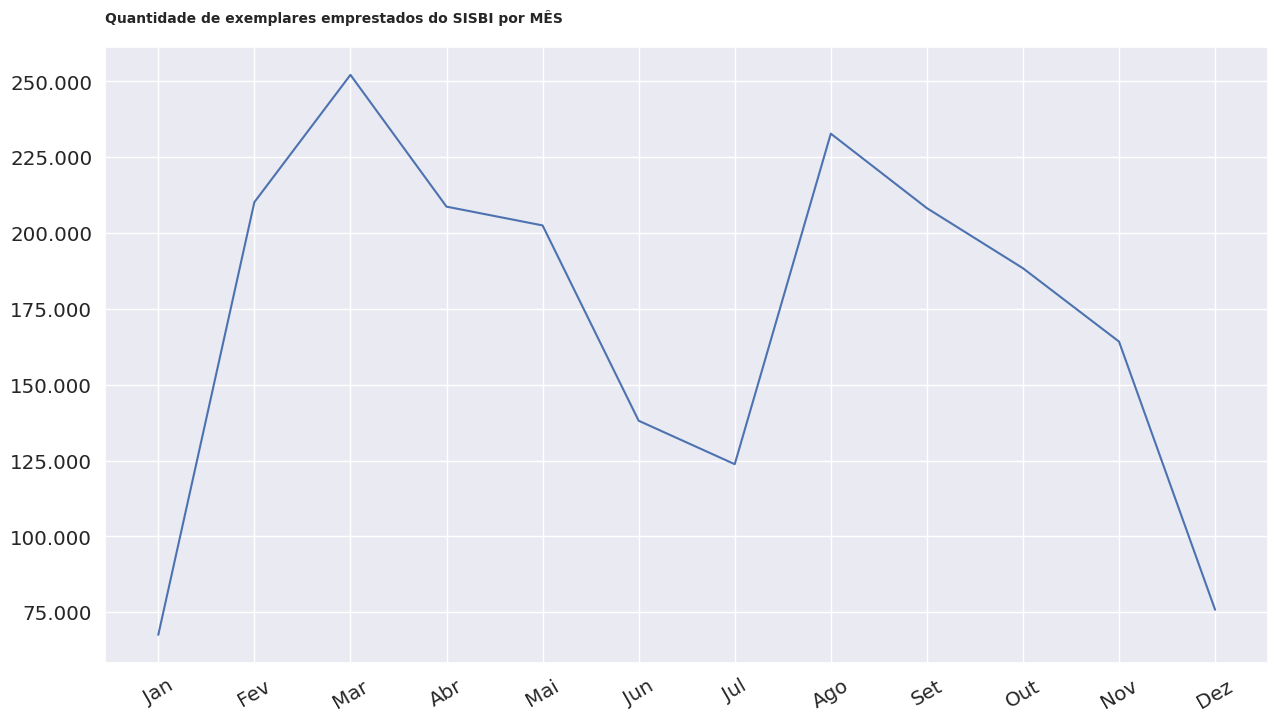

In [45]:
ax = sns.lineplot(data=emprestimos_por_mes,x='mes_emprestimo',y='total_emprestimos')
ax.set(xlabel=None, ylabel=None)
ax.tick_params(axis='x', rotation=30)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))

ax.set_title('Quantidade de exemplares emprestados do SISBI por MÊS'+'\n', size=10, loc='left', weight='bold')

### Quantidade de empréstimos POR DIA

In [46]:
# Extraindo O DIA da coluna de data
emprestimos_completo['dia'] = emprestimos_completo['data_emprestimo'].dt.day

In [47]:
# Agrupando por DIA e contando o número de empréstimos em cada grupo
emprestimos_por_dia = emprestimos_completo.groupby('dia').size().reset_index(name='quantidade')

In [48]:
# Ordenando por DIA
emprestimos_por_dia = emprestimos_por_dia.sort_values('dia')

emprestimos_por_dia

,dia,quantidade
0,1,55482
1,2,62525
2,3,60388
3,4,69728
4,5,70993
5,6,73773
6,7,63255
7,8,69502
8,9,70434
9,10,70624


Text(0.0, 1.0, 'Quantidade de exemplares emprestados do SISBI por DIA\n')

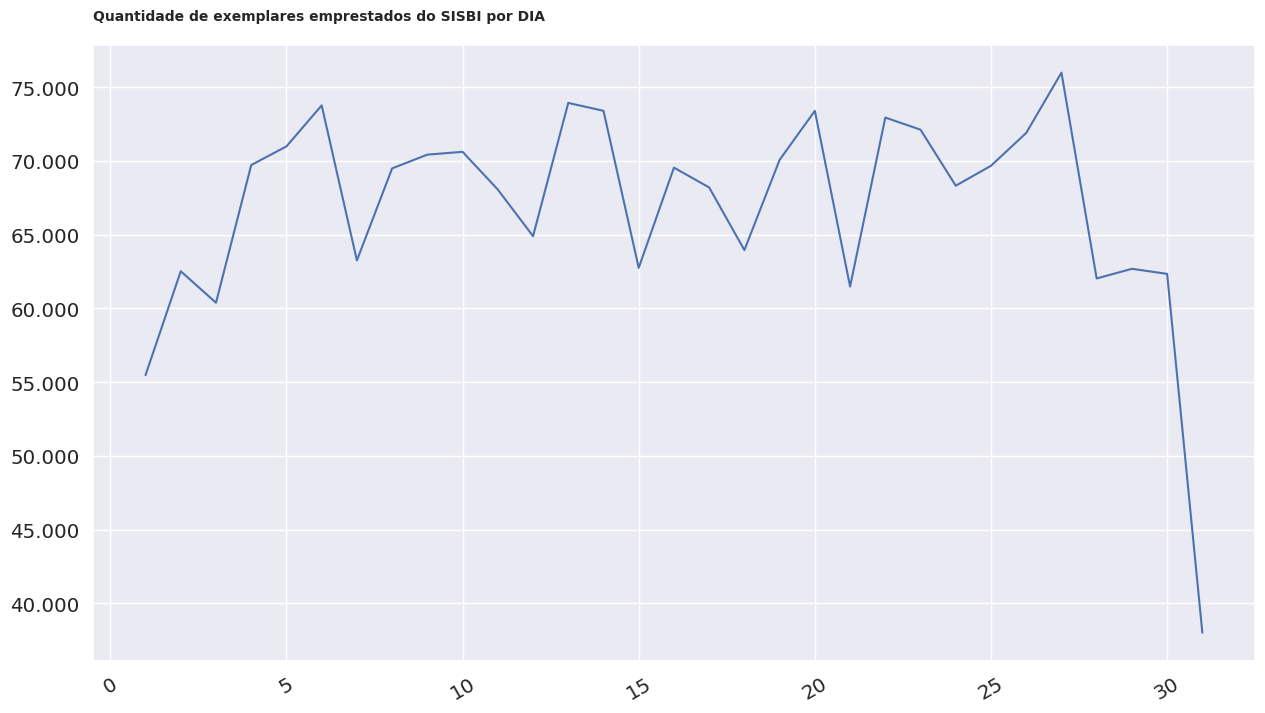

In [49]:
ax = sns.lineplot(data=emprestimos_por_dia,x='dia',y='quantidade')
ax.set(xlabel=None, ylabel=None)
ax.tick_params(axis='x', rotation=30)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))

ax.set_title('Quantidade de exemplares emprestados do SISBI por DIA'+'\n', size=10, loc='left', weight='bold')

### Quantidade de empréstimos POR HORA ao longo do dia

In [50]:
# Extraindo a hora da coluna de data
emprestimos_completo['hora'] = emprestimos_completo['data_emprestimo'].dt.hour

In [51]:
# Agrupando por hora e contando o número de empréstimos em cada grupo
emprestimos_por_hora = emprestimos_completo.groupby('hora').size().reset_index(name='quantidade')

In [52]:
# Ordenando por hora
emprestimos_por_hora = emprestimos_por_hora.sort_values('hora')

emprestimos_por_hora

,hora,quantidade
0,0,17
1,6,14
2,7,18777
3,8,103416
4,9,131273
5,10,185839
6,11,180048
7,12,148754
8,13,126987
9,14,150876


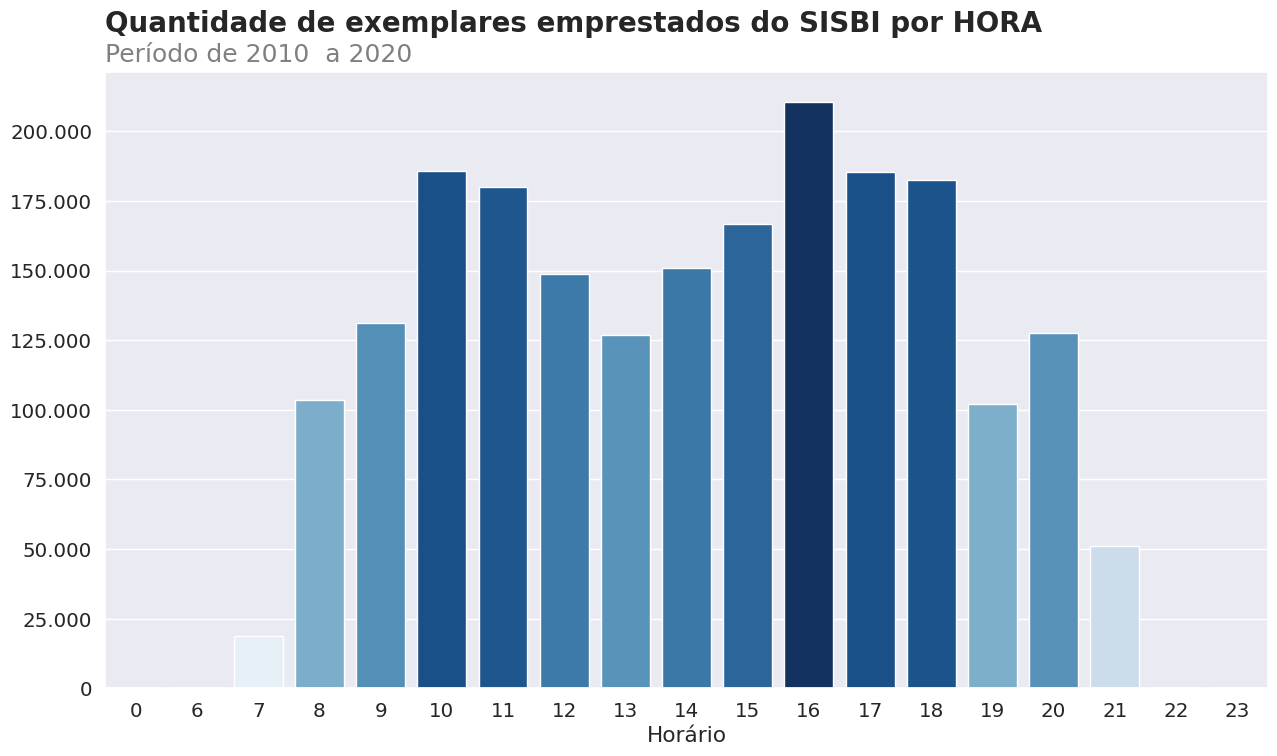

In [53]:
ax = sns.barplot(data=emprestimos_por_hora,x='hora',y='quantidade', palette='Blues', hue='quantidade', dodge=False)
plt.legend([],[], frameon=False)

ax.set(xlabel='Horário', ylabel=None)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))
ax.set_title('Quantidade de exemplares emprestados do SISBI por HORA'+'\n', size=20, loc='left', weight='bold')
ax.text(s='Período de 2010  a 2020',x=-0.5,y=225000,fontsize=18,ha='left',color='gray')
ax=ax

# Dia 4 - Continuando a explorar os dados

In [54]:
emprestimos_completo.head(5)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,ano,mes_emprestimo,dia,hora
0,709684,L095049,NaN,2010-01-04 07:44:10.721,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,2010,1,4,7
1,726965,L095049,2010/03/31 12:41:08.684000000,2010-03-01 12:40:56.212,2010/04/30 14:42:35.366000000,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,2010,3,1,12
2,709685,L167050,NaN,2010-01-04 07:44:10.750,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,2010,1,4,7
3,717763,L167050,NaN,2010-02-11 11:16:30.335,2010/03/04 08:54:32.262000000,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,2010,2,11,11
4,729996,L167050,2010/03/17 09:08:26.874000000,2010-03-04 13:36:26.599,2010/03/31 18:04:29.669000000,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,2010,3,4,13


In [55]:
# modificando o tipo de dado da coluna 'data'
emprestimos_completo['data'] = pd.to_datetime(emprestimos_completo['data_emprestimo'])

In [56]:
#verificando valores únicos em algumas colinas do dataframe
emprestimos_completo.tipo_vinculo_usuario.unique()

array(['ALUNO DE GRADUAÇÃO', 'ALUNO DE PÓS-GRADUAÇÃO', 'DOCENTE',
       'DOCENTE EXTERNO', 'SERVIDOR TÉCNICO-ADMINISTRATIVO',
       'ALUNO MÉDIO/TÉCNICO', 'USUÁRIO EXTERNO', 'OUTROS'], dtype=object)

In [57]:
emprestimos_completo.colecao.unique()

array(['Acervo Circulante', 'Folhetos', 'Teses', 'Dissertações',
       'Monografias', 'Publicações de Autores do RN',
       'Publicações da UFRN', 'Multimeios', 'Coleção Mossoroense',
       'Eventos', 'Trabalho Acadêmico', 'Obras de Referência',
       'Obras Raras', 'Literatura de Cordel', 'Coleção Zila Mamede',
       'Necessidades Educacionais Específicas'], dtype=object)

In [58]:
emprestimos_completo.biblioteca.unique()

array(['Biblioteca Central Zila Mamede',
       'Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ  - Macaiba',
       'Biblioteca Setorial Bertha Cruz Enders - \xadEscola de Saúde da UFRN - ESUFRN',
       'Biblioteca Setorial do Centro Ciências da Saúde - CCS',
       'Biblioteca Setorial Prof. Alberto Moreira Campos - \xadDepartamento de Odontologia',
       'Biblioteca Setorial Prof. Ronaldo Xavier de Arruda - CCET',
       'Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA',
       'Biblioteca Setorial Prof. Horácio Nicolas Solimo - \xad Engenharia Química - EQ - CT',
       'Biblioteca Setorial Prof. Francisco Gurgel De Azevedo - Instituto Química - IQ',
       'Biblioteca Setorial do Centro Ciências Sociais Aplicadas - CCSA',
       'Biblioteca Setorial do Departamento de Artes - DEART',
       'Biblioteca Setorial Prof. Dr. Marcelo Bezerra de Melo Tinôco - DARQ - \xadCT',
       'Biblioteca Setorial Árvore do Conhecimento - In

In [59]:
emprestimos_completo.localizacao.unique()

array(['Ciências aplicadas.', 'Linguagem. Língua. Linguística.',
       'Ciências sociais.', 'Geografia. Biografia. História.',
       'Matemática e ciências naturais.', 'Religião.',
       'Generalidades. Ciência e conhecimento.',
       'Filosofia e psicologia.', 'Belas artes.'], dtype=object)

# Função

In [60]:
def tabela_frequencia(variavel):
    '''
    Esta função irá gerar uma tabela de frequência com os percentuais de acordo com a variável passada.
    variavel = variável categórica escolhida de dentro do conjunto de dados emprestimo_completo
    '''
    # Criando o DataFrame com a contagem de valores
    dataframe = pd.DataFrame(emprestimos_completo[variavel].value_counts())
    dataframe.columns = ['quantidade']

    # Calculando os percentuais
    dataframe['percentual'] = round((dataframe['quantidade'] / dataframe['quantidade'].sum()) * 100, 1)

    return dataframe


In [63]:
# Quantos foram os vículos de usuários
tabela_frequencia('tipo_vinculo_usuario')

,quantidade,percentual
tipo_vinculo_usuario,,
ALUNO DE GRADUAÇÃO,1612324,77.8
ALUNO DE PÓS-GRADUAÇÃO,302541,14.6
DOCENTE,70981,3.4
SERVIDOR TÉCNICO-ADMINISTRATIVO,32184,1.6
ALUNO MÉDIO/TÉCNICO,28029,1.4
DOCENTE EXTERNO,23949,1.2
USUÁRIO EXTERNO,2509,0.1
OUTROS,5,0.0


In [64]:
# Quantos foram por biblioteca
tabela_frequencia('biblioteca')

,quantidade,percentual
biblioteca,,
Biblioteca Central Zila Mamede,1426122,68.8
Biblioteca Setorial do Centro Ciências da Saúde - CCS,118614,5.7
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz,77609,3.7
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia,66447,3.2
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó,61478,3.0
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN,46040,2.2
"Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA",40744,2.0
Biblioteca Setorial Dr. Paulo Bezerra - EMCM/RN - Caicó,32097,1.5
Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos,29089,1.4


# Analisando empréstimos com Boxplot

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
emprestimos_completo.head(5)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,ano,mes_emprestimo,dia,hora,data
0,709684,L095049,NaN,2010-01-04 07:44:10.721,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,2010,1,4,7,2010-01-04 07:44:10.721
1,726965,L095049,2010/03/31 12:41:08.684000000,2010-03-01 12:40:56.212,2010/04/30 14:42:35.366000000,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,2010,3,1,12,2010-03-01 12:40:56.212
2,709685,L167050,NaN,2010-01-04 07:44:10.750,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,2010,1,4,7,2010-01-04 07:44:10.750
3,717763,L167050,NaN,2010-02-11 11:16:30.335,2010/03/04 08:54:32.262000000,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,2010,2,11,11,2010-02-11 11:16:30.335
4,729996,L167050,2010/03/17 09:08:26.874000000,2010-03-04 13:36:26.599,2010/03/31 18:04:29.669000000,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,2010,3,4,13,2010-03-04 13:36:26.599


In [69]:
# frequência de emprestimos dos alunos de graduação
alunos_graduacao = emprestimos_completo.query('tipo_vinculo_usuario == "ALUNO DE GRADUAÇÃO"')
alunos_graduacao.colecao.value_counts()

colecao
Acervo Circulante                        1600155
Multimeios                                  4652
Monografias                                 3572
Dissertações                                1152
Obras de Referência                         1047
Publicações de Autores do RN                 595
Publicações da UFRN                          466
Teses                                        245
Folhetos                                     180
Trabalho Acadêmico                            81
Necessidades Educacionais Específicas         73
Eventos                                       57
Coleção Mossoroense                           17
Coleção Zila Mamede                           15
Literatura de Cordel                          11
Obras Raras                                    6
Name: count, dtype: int64

In [76]:
# quantidade mensal por ano da maior frequência de emprestimos dos alunos de graduação
alunos_graduacao_acervo_circulante = alunos_graduacao.query('colecao == "Acervo Circulante"')
alunos_graduacao_acervo_circulante = pd.DataFrame(alunos_graduacao_acervo_circulante)
alunos_graduacao_acervo_circulante['data_emprestimo'] = pd.to_datetime(alunos_graduacao_acervo_circulante['data_emprestimo'])
alunos_graduacao_acervo_circulante['ano'] = alunos_graduacao_acervo_circulante['data_emprestimo'].dt.year
alunos_graduacao_acervo_circulante['mes'] = alunos_graduacao_acervo_circulante['data_emprestimo'].dt.month
alunos_graduacao_acervo_circulante = alunos_graduacao_acervo_circulante.loc[:,['ano', 'mes']]
alunos_graduacao_acervo_circulante = alunos_graduacao_acervo_circulante.value_counts().to_frame('quantidade').reset_index()
alunos_graduacao_acervo_circulante

,ano,mes,quantidade
0,2012,3,22797
1,2015,3,22483
2,2013,4,21853
3,2017,3,21735
4,2016,3,21692
...,...,...,...
118,2016,1,2670
119,2019,1,2276
120,2019,12,1980
121,2020,1,1781


In [70]:
# Função gera Box_Plot
def gera_box_plot(database,x,y,titulo,subtitulo):
  '''
  Esse função irá gerar um gráfico de BloxPot

  Dataset = conjunto de dados do gráfico
  x = valor do eixo x do gráfico
  y = valor do eixo y do gráfico
  título = título do gráfico
  subtitulo = subtítulo do texto
  '''

sns.set_theme(style='darkgrid', palette='Blues', front_scale=1.3)
plt.figure(figsize=(16,10))